In [1]:
import skimage.io as io
from scipy import signal
from skimage.transform import resize
import numpy as np
import math
io.use_plugin('imageio')
def GHOST(imorig, checkDisplacements=0):
    imorig=np.array(imorig)
    minQ=51
    maxQ=100
    stepQ=1
    dispImages={}
    
    if(checkDisplacements==1):
        maxDisp=7
    else:
        maxDisp=0
    
    smoothing_b=17
    Offset=int((smoothing_b-1)/2)
    
    for ii in range(minQ,maxQ+1,stepQ):
        io.imsave('tmpResave.jpg',imorig,quality=ii)
        tmpResave=np.array(io.imread('tmpResave.jpg'))
        Deltas={}
        overallDelta={}
        for dispx in range(maxDisp+1):
            for dispy in range(maxDisp+1):
                DisplacementIndex=dispx*8+dispy+1
                tmpResave_disp=tmpResave[1+dispx:,1+dispy:,:]
                imorig_disp=imorig[:-1-dispx,:-1-dispy,:]
                Comparison=np.array((imorig_disp-tmpResave_disp)**2)
                h=np.ones((smoothing_b,smoothing_b))/(smoothing_b**2)
                
                Comparison=[signal.convolve2d(Comparison[:,:,jj],h) for jj in range(Comparison.shape[2])]
                Comparison=np.moveaxis(Comparison,0,-1)
                Comparison=Comparison[Offset+1:-1-Offset,Offset+1:-1-Offset,:]
                
                Deltas[DisplacementIndex]=np.mean(Comparison,axis=2)
                overallDelta[DisplacementIndex]=np.mean(Deltas[DisplacementIndex])
        
        minInd=min(overallDelta, key=overallDelta.get)
        minOverallDelta=overallDelta[minInd]
        delta=Deltas[minInd]
        delta=(delta-delta.min())/(delta.max()-delta.min())
        
        newSize=(round(imorig.shape[i]/4) for i in range(2))
        dispImages[int((ii-minQ)/stepQ)]=resize(delta,newSize)
    return dispImages

<ipython-input-2-df3fb449a623>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


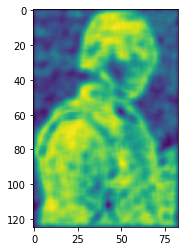

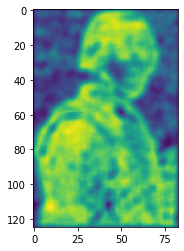

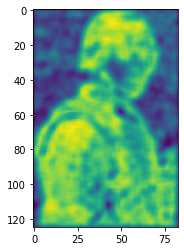

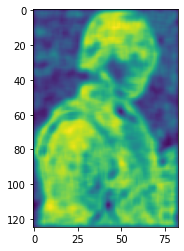

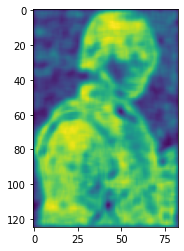

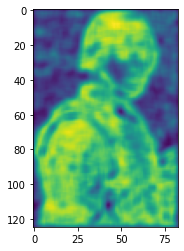

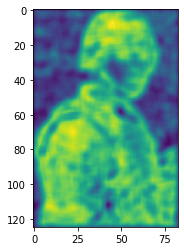

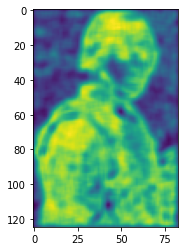

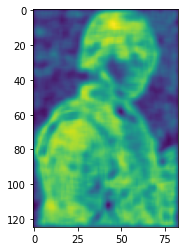

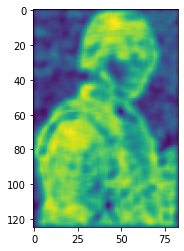

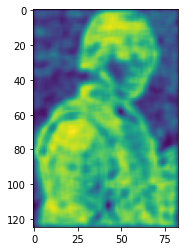

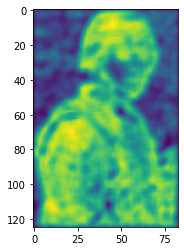

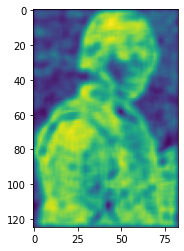

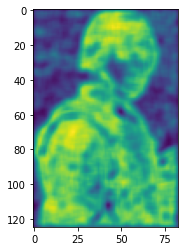

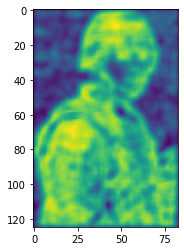

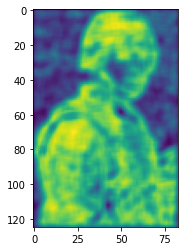

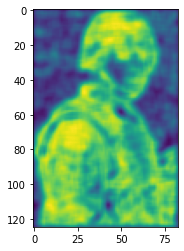

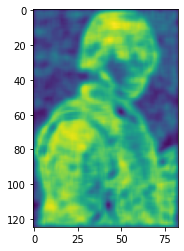

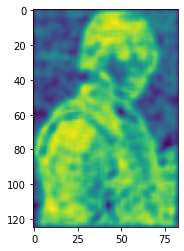

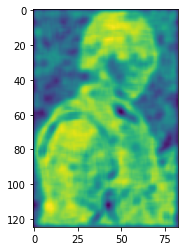

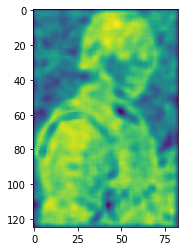

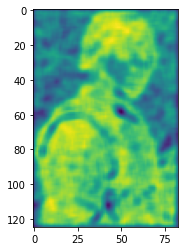

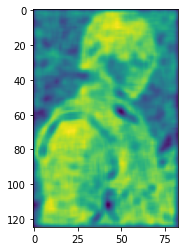

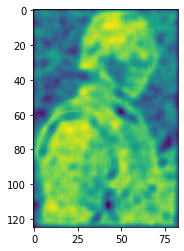

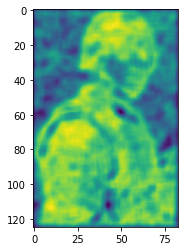

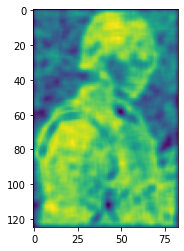

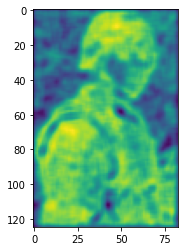

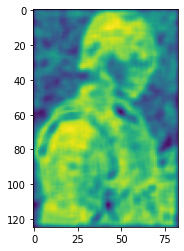

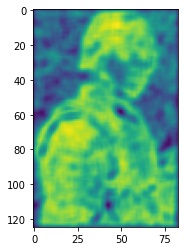

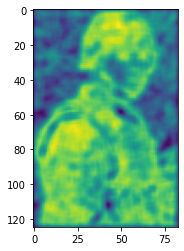

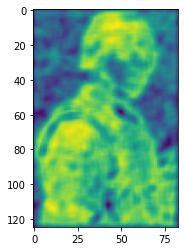

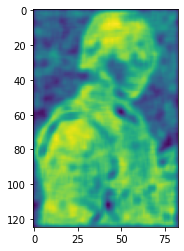

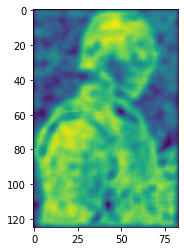

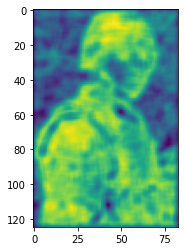

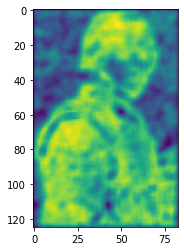

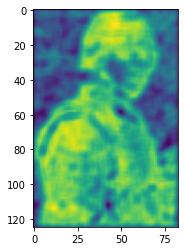

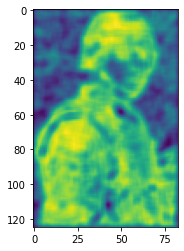

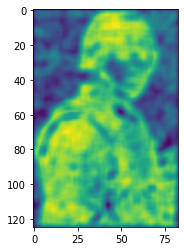

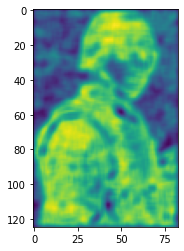

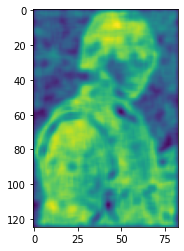

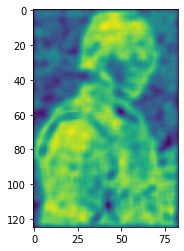

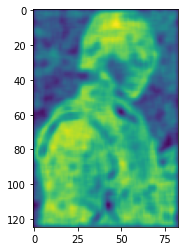

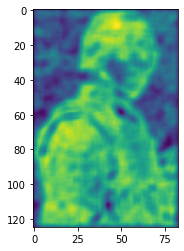

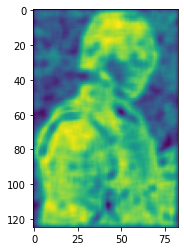

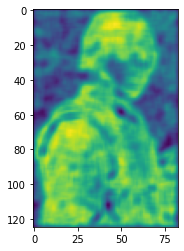

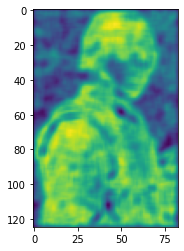

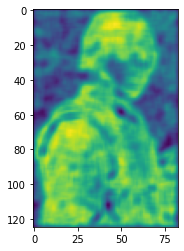

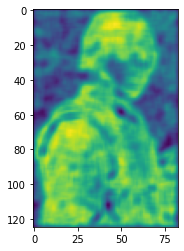

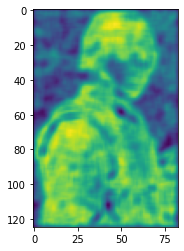

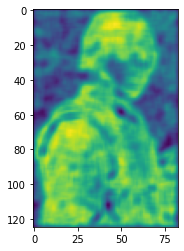

In [2]:
import matplotlib.pyplot as plt
OutputMap=GHOST(io.imread("demo.jpg"))
for i in range(50):
    plt.figure()
    plt.imshow(OutputMap[i])